# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

In [1]:
!pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask

In [3]:
import zipfile

zip_file_path = 'dataset.zip'
extract_path = 'datasets'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
import os
main_dataset_directory = 'datasets/chest_xray/chest_xray'

print("Contenu du dataset principal:")
print(os.listdir(main_dataset_directory))

print("\ncontenu du train:")
print(os.listdir(os.path.join(main_dataset_directory, 'train')))

print("\ncontenu du train:")
print(os.listdir(os.path.join(main_dataset_directory, 'test')))

Contenu du dataset principal:
['.DS_Store', 'test', 'train', 'val']

contenu du train:
['.DS_Store', 'NORMAL', 'PNEUMONIA']

contenu du train:
['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [6]:
import tensorflow as tf
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [7]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns


from PIL import Image

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

class_normal = []
DOSSIERS = ['test', 'val', 'train']
CLASSES = ['NORMAL', 'PNEUMONIA']

for f in DOSSIERS:
    folder = os.path.join(main_dataset_directory, f)

    for path in os.listdir(os.path.join(folder, 'NORMAL')):
        class_normal.append([os.path.join(folder, 'NORMAL/'+path), 0])
normal_df = pd.DataFrame(class_normal, columns=['filepaths', 'labels'])

In [9]:
class_pneumonia = []

for f in DOSSIERS:
    folder = os.path.join(main_dataset_directory, f)
    for path in os.listdir(os.path.join(folder, 'PNEUMONIA')):
        class_pneumonia.append([os.path.join(folder, 'PNEUMONIA/'+path), 1])
pneumonia_df = pd.DataFrame(class_pneumonia, columns=['filepaths', 'labels'])

In [10]:
df = pd.concat([normal_df, pneumonia_df], axis=0).reset_index()
df.drop('index', axis=1, inplace=True)
df.head()

,filepaths,labels
0,datasets/chest_xray/chest_xray\test\NORMAL/IM-...,0
1,datasets/chest_xray/chest_xray\test\NORMAL/IM-...,0
2,datasets/chest_xray/chest_xray\test\NORMAL/IM-...,0
3,datasets/chest_xray/chest_xray\test\NORMAL/IM-...,0
4,datasets/chest_xray/chest_xray\test\NORMAL/IM-...,0


In [11]:
def read_img(path, target_size):
    img = image.load_img(path, target_size=target_size)
    img = image.img_to_array(img) /255.
    return img

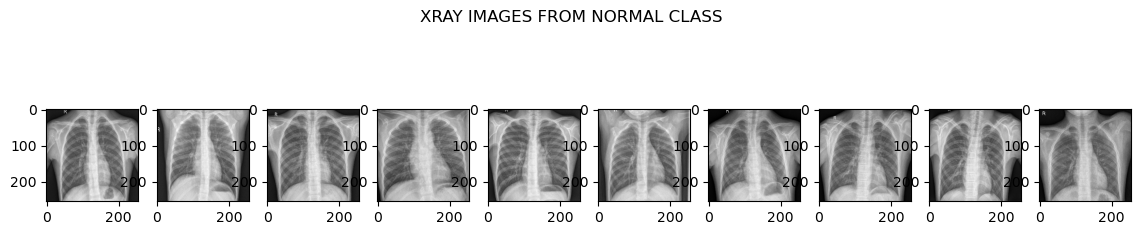

In [12]:
fig, ax = plt.subplots(1,10,figsize=(14,3));
plt.suptitle('XRAY IMAGES FROM NORMAL CLASS')

for i,path in enumerate(normal_df.filepaths[:10].values):
    ax[i].imshow(read_img(path, (255,255)))

In [13]:
import os
from PIL import Image

count=0
for filename in os.listdir(os.path.join(main_dataset_directory, 'train')):
    if filename.endswith('.JPG'):
     try:
      img=Image.open(os.listdir(os.path.join(main_dataset_directory, 'train'))+filename)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file  :  '+filename)
         count=count+1
         print(count)

## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


In [18]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def loadingData(train_path, val_path, batch_size=32, target_size=(128, 128)):
    datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    train_generator = datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary'
    )
    val_generator = datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    return train_generator, val_generator

In [20]:
from PIL import Image

def scanImages(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            try:
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError) as e:
                print(f"Removing corrupted image: {image_path}")
                os.remove(image_path)

In [21]:
train_path = r'datasets\chest_xray\train'
val_path = r'datasets\chest_xray\val'
train_generator, val_generator = loadingData(train_path, val_path)

scanImages(extract_path)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Removing corrupted image: datasets\chest_xray\chest_xray\.DS_Store
Removing corrupted image: datasets\chest_xray\chest_xray\test\.DS_Store
Removing corrupted image: datasets\chest_xray\chest_xray\train\.DS_Store
Removing corrupted image: datasets\chest_xray\chest_xray\train\NORMAL\.DS_Store
Removing corrupted image: datasets\chest_xray\chest_xray\train\PNEUMONIA\.DS_Store
Removing corrupted image: datasets\chest_xray\chest_xray\val\.DS_Store
Removing corrupted image: datasets\chest_xray\chest_xray\val\NORMAL\.DS_Store
Removing corrupted image: datasets\chest_xray\chest_xray\val\PNEUMONIA\.DS_Store


In [22]:
import matplotlib.pyplot as plt

test_path = r'datasets\chest_xray\test'

def visualize_samples(data_path, class_name, num_samples=4):
    class_path = os.path.join(data_path, class_name)
    class_images = os.listdir(class_path)[:num_samples]
    plt.figure(figsize=(12, 8))
    for i, image_name in enumerate(class_images):
        img = Image.open(os.path.join(class_path, image_name))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f'{class_name} Sample {i + 1}')
        plt.axis('off')
    plt.show()

def class_distribution(data_path):
    classes = os.listdir(data_path)
    class_counts = [len(os.listdir(os.path.join(data_path, cls))) for cls in classes]
    plt.figure(figsize=(8, 6))
    plt.bar(classes, class_counts)
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.show()

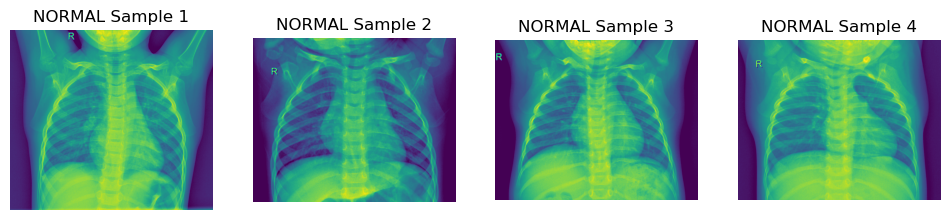

In [23]:
visualize_samples(train_path, 'NORMAL')

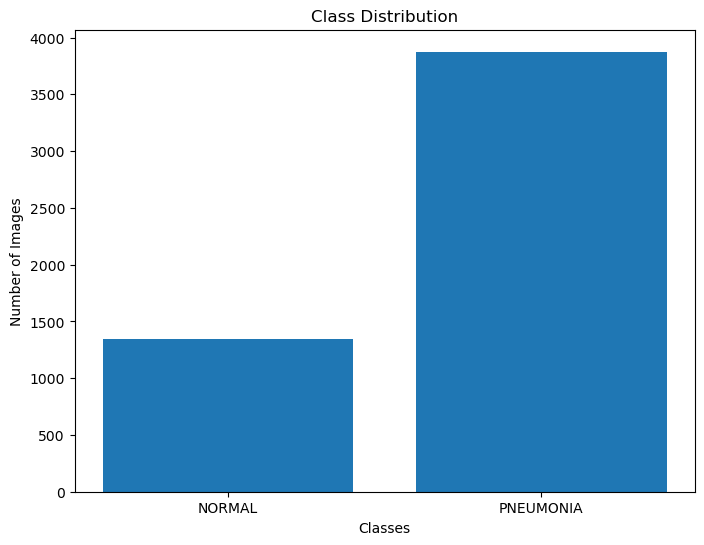

In [24]:
class_distribution(train_path)

## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.


In [35]:
img_height = 224
img_width = 224
training_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,rotation_range=0.2,zoom_range=0.2, horizontal_flip=True,vertical_flip=True)

training_generator = training_data_gen.flow_from_directory(train_path,target_size=(img_height, img_width), batch_size=32,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [27]:
baseline_model = tf.keras.models.Sequential()

baseline_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1),
                                          activation='relu', input_shape=(224, 224, 3) ))
baseline_model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))


baseline_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                          strides=(1, 1), activation='relu'))
baseline_model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))


baseline_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
                                          strides=(1, 1), activation='relu'))
baseline_model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))


baseline_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),
                                          strides=(1, 1), activation='relu'))
baseline_model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))


In [28]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [29]:
baseline_model.add(tf.keras.layers.Flatten())

baseline_model.add(tf.keras.layers.Dense(256, activation='relu',
                                        kernel_initializer='he_normal'))
baseline_model.add(tf.keras.layers.BatchNormalization())
baseline_model.add(tf.keras.layers.Dropout(0.4))

baseline_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [30]:
def decayed_learning_rate(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(decayed_learning_rate)

In [31]:
early_stopting = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=6)

In [37]:
val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
validation_generator = val_data_gen.flow_from_directory(val_path,
                                                        target_size=(img_height, img_width),
                                                        batch_size=8,
                                                        class_mode='binary')

baseline_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                       loss=tf.keras.losses.BinaryCrossentropy(),
                       metrics=['accuracy'])

baseline_history = baseline_model.fit(training_generator,
                                      steps_per_epoch=163,
                                      epochs=10, 
                                      validation_data=validation_generator,
                                      validation_steps=78, 
                                      callbacks=[lr_scheduler, early_stopting])


Found 16 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 704s 4s/step - loss: 0.3724 - accuracy: 0.8466 - val_loss: 0.6974 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 2/10
163/163 [==============================] - 810s 5s/step - loss: 0.2624 - accuracy: 0.9039 - lr: 0.0089
Epoch 3/10
163/163 [==============================] - 713s 4s/step - loss: 0.2261 - accuracy: 0.9176 - lr: 0.0079
Epoch 4/10
163/163 [==============================] - 665s 4s/step - loss: 0.1993 - accuracy: 0.9245 - lr: 0.0071
Epoch 5/10
163/163 [==============================] - 651s 4s/step - loss: 0.1917 - accuracy: 0.9289 - lr: 0.0063
Epoch 6/10
163/163 [==============================] - 833s 5s/step - loss: 0.1868 - accuracy: 0.9321 - lr: 0.0056
Epoch 7/10
163/163 [==============================] - 753s 5s/step - loss: 0.1791 - accuracy: 0.9327 - lr: 0.0050
Epoch 8/10
163/163 [==============================] - 614s 4s/step - loss: 0.1791 - accuracy: 0.9342 - lr: 0.0045
Epoch 

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

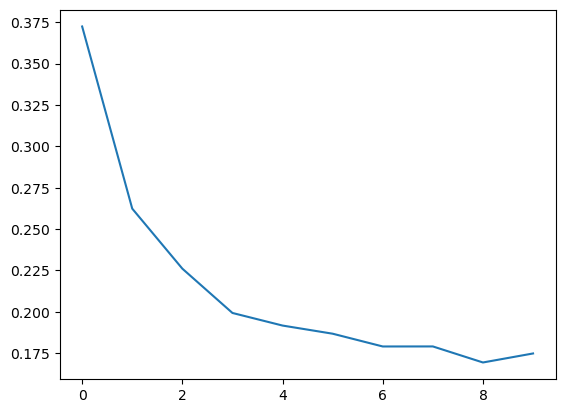

In [38]:
baseline_train_loss = baseline_history.history['loss']
baseline_val_loss = baseline_history.history['val_loss']


plt.plot(baseline_history.epoch, baseline_train_loss, label='Training Loss')
plt.plot(baseline_history.epoch, baseline_val_loss, label='Validation Loss')
plt.grid(True)
plt.legend()

In [ ]:
baseline_train_acc = baseline_history.history['accuracy']
baseline_val_acc = baseline_history.history['val_accuracy']

plt.plot(baseline_history.epoch, baseline_train_acc, label='Training Accuracy')
plt.plot(baseline_history.epoch, baseline_val_acc, label='Validation Accuracy')
plt.grid(True)
plt.legend()

In [39]:
baseline_testset_loss, baseline_testest_acc = baseline_model.evaluate(test_generator)
print("The test set loss: {}, Test set Accuracy: {}".format(baseline_testset_loss, baseline_testest_acc))

NameError: name 'test_generator' is not defined

## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.


In [ ]:
class ResidualUnit(tf.keras.layers.Layer):
    
    def __init__(self,filters, strides, activation, **kwargs):
        super().__init__(**kwargs)
        
        self.activation = tf.keras.activations.get(activation)
        
        self.main_layers = [
            tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=strides, 
                                  padding='same', use_bias=False),
            tf.keras.layers.BatchNormalization(),
            self.activation,
            tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=1, 
                                  padding='same', use_bias=False),
            tf.keras.layers.BatchNormalization()]
        
        self.skip_con_layers = []
        if strides > 1:
            self.skip_con_layers = [
                tf.keras.layers.Conv2D(filters, kernel_size=(1, 1), strides=strides, 
                                       padding='same', use_bias=False),
                tf.keras.layers.BatchNormalization()]
        
        
        def call(self, inputs):
            
            z = inputs 
            for layer in self.main_layers:
                z = layer(z)
                
            skip_z = inputs
            for layer in self.skip_con_layers:
                skip_z = layer(skip_z)
            
            return self.activation(z + skip_z)

In [ ]:
simple_ResNet_model = tf.keras.models.Sequential()


simple_ResNet_model.add(tf.keras.layers.Conv2D(64, 7, strides=2, input_shape=(224,224,3),
                                       use_bias=False))
simple_ResNet_model.add(tf.keras.layers.MaxPool2D(pool_size=3))
simple_ResNet_model.add(tf.keras.layers.BatchNormalization())
simple_ResNet_model.add(tf.keras.layers.Activation('relu'))
simple_ResNet_model.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same'))


simple_ResNet_model.add(ResidualUnit(filters=64, strides=1, activation='relu'))
simple_ResNet_model.add(ResidualUnit(filters=64, strides=1, activation='relu'))

simple_ResNet_model.add(ResidualUnit(filters=128, strides=2, activation='relu'))
simple_ResNet_model.add(ResidualUnit(filters=128, strides=1, activation='relu'))


simple_ResNet_model.add(tf.keras.layers.Flatten())
simple_ResNet_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
tf.keras.utils.plot_model(simple_ResNet_model,
                         show_shapes=True,
                         show_dtype=True,
                         show_layer_names=True,
                         expand_nested=True)

In [ ]:
simple_ResNet_model.summary()

In [ ]:
from tensorflow.keras import backend as K
def F1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'), 
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.AUC(name='prc', curve='PR'),
    F1_score]

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=750,
    decay_rate=0.92,
    staircase=True)

In [ ]:
simple_ResNet_model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule),
                           loss=tf.keras.losses.BinaryCrossentropy(),
                           metrics=METRICS)

simple_ResNet_history = simple_ResNet_model.fit(training_generator,
                                                steps_per_epoch=163,
                                                epochs=15, 
                                                validation_data=validation_generator,
                                                validation_steps=78, 
                                                callbacks=[early_stopting])

In [ ]:
simple_ResNet_mode_results = simple_ResNet_model.evaluate(test_generator)

for name, value in zip(simple_ResNet_model.metrics_names, simple_ResNet_mode_results):
    print(name, ': ', value)
print()  

In [ ]:
actual_positive = len(os.listdir(training_data_path/'PNEUMONIA'))
actual_negative = len(os.listdir(training_data_path/'NORMAL'))
simple_ResNet_train_precision = simple_ResNet_history.history['precision'][0]
simple_ResNet_train_recall = simple_ResNet_history.history['recall'][0]
simple_ResNet_train_ROC_AUC = simple_ResNet_history.history['auc'][0]
simple_ResNet_train_prc = simple_ResNet_history.history['prc'][0]
simple_ResNet_train_F1_score = simple_ResNet_history.history['F1_score'][0]

print("The FalsePositives was {} out of {} that are truly negative that were calssified as positive.".format(simple_ResNet_history.history['fp'][0], actual_negative))
print("so we have a precesion of {}".format(simple_ResNet_train_precision))
print("\n")

print("The FalseNegatives was {} out of {} that are truly positive that were calssified as negative.".format(simple_ResNet_history.history['fn'][0], actual_positive))
print("so we have a recall of {}".format(simple_ResNet_train_recall))
print("\n")

print("The F1-score: {}".format(simple_ResNet_train_F1_score))
print("\n")

print("The Area Under the Curve of a Receiver Operating Characteristic curve ROC-AUC: {}".format(simple_ResNet_train_ROC_AUC))
print("And the Area Under the Curve of the Precision-Recall Curve prc: {}".format(simple_ResNet_train_prc))
print("\n")

In [ ]:
actual_positive = len(os.listdir(testing_data_path/'PNEUMONIA'))
actual_negative = len(os.listdir(testing_data_path/'NORMAL'))
simple_ResNet_val_precision = simple_ResNet_history.history['val_precision'][0]
simple_ResNet_val_recall = simple_ResNet_history.history['val_recall'][0]
simple_ResNet_val_ROC_AUC = simple_ResNet_history.history['val_auc'][0]
simple_ResNet_val_prc = simple_ResNet_history.history['val_prc'][0]
simple_ResNet_val_F1_score = simple_ResNet_history.history['val_F1_score'][0]

print("The FalsePositives was {} out of {} that are truly negative that were calssified as positive.".format(simple_ResNet_history.history['val_fp'][0], actual_negative))
print("so we have a precesion of {}".format(simple_ResNet_val_precision))
print("\n")

print("The FalseNegatives was {} out of {} that are truly positive that were calssified as negative.".format(simple_ResNet_history.history['val_fn'][0], actual_positive))
print("so we have a recall of {}".format(simple_ResNet_val_recall))
print("\n")

print("The F1-score: {}".format(simple_ResNet_val_F1_score))
print("\n")

print("The Area Under the Curve of a Receiver Operating Characteristic curve ROC-AUC: {}".format(simple_ResNet_val_ROC_AUC))
print("And the Area Under the Curve of the Precision-Recall Curve prc: {}".format(simple_ResNet_val_prc))
print("\n")

## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


In [ ]:

# Your code here for Data Augmentation


## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


In [ ]:

# Your code here for Model Evaluation


## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [ ]:

from flask import Flask
app = Flask(__name__)

@app.route('/')
def index():
  return 'Server Works!'
  
@app.route('/greet')
def say_hello():
  return 'Hello from Server'


In [ ]:
@app.route('/')
def index():
  return 'Index Page'

@app.route('/hello')
def hello():
  return 'Hello, greetings from different endpoint'

#adding variables
@app.route('/user/<username>')
def show_user(username):
  #returns the username
  return 'Username: %s' % username

@app.route('/post/<int:post_id>')
def show_post(post_id):
  #returns the post, the post_id should be an int
  return str(post_id)

In [ ]:

from flask import Flask, request
app = Flask(__name__)

@app.route('/login', methods=['GET','POST'])
def login():
  if request.method == 'POST':
    #check user details from db
    login_user()
  elif request.method == 'GET':
    #serve login page
    serve_login_page()

In [ ]:

from flask import Flask, render_template
app = Flask(__name__)

@app.route('/user/<name>')
def hello(name=None):
  #name=None ensures the code runs even when no name is provided
  return render_template('user-profile.html', name=name)

In [ ]:

from flask import Flask, request
app = Flask(__name__)

@app.route('/user', methods=['GET','POST'])
def get_user():
  username = request.form['username']
  password = request.form['password']
  #login(arg,arg) is a function that tries to log in and returns true or false
  status = login(username, password)
  return status


### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.


